# Evaluation of LSTM-model vs. Bouma & Hermans' model on out-of-corpus sample

*Visual evaluation of the automatic syllabifier, using Altair*

In [43]:
import pandas as pd
import numpy as np
import altair as alt

We load the original training set of 20139 sylabified words from Bouma en Hermans. This list of words is organized alphabetically and runs up until the word _kerstauonde_; i.e. words starting in the range L-Z ar not part of the training data!

In [44]:
bouma_hermans = {w.replace('-','').strip() for w in open('../data/crm1.txt')}

Next, we load the new data set, which is a sample of 2000 words taken from the Corpus of Middle Dutch rhymed texts. This sample will serve as an evaluation of the predictions made by the syllabifier. We expect that mistakes will be made with regard to words in the range L-Z.

In [45]:
new = {w.replace('-', '').strip() for w in open('../data/syllabified_sample_words_intersection.txt')}

Before we will evaluate the model, we want to know the overlap (or: intersection) of words between both data sets.

In [46]:
intersection = bouma_hermans.intersection(new)
print('The overlap is', len(intersection), "words.")

The overlap is 0 words.


### 1. Evaluation of Bouma & Hermans' model on out-of corpus sample
After manually checking the predictions for the 1748-word sample, we get an idea of how well the syllabifier performs on new, unseen data. The column below shows for each letter in the alphabet how many predictions are correct (True) and how many are incorrect (False).

In [47]:
df = pd.read_excel('../data/evaluation_syllabifier.xlsx')
df['correction'] = (df['bouma_hermans'] == df['gold_standard'])
df['alphabet'] = df['gold_standard'].astype(str).str[0]

x = df.groupby('alphabet').correction.value_counts().to_frame()
x.columns = ['counts']
x = x.reset_index()
x

,alphabet,correction,counts
0,a,True,76
1,a,False,9
2,b,True,115
3,b,False,9
4,c,True,90
5,c,False,9
6,d,True,90
7,d,False,13
8,e,True,32
9,e,False,11


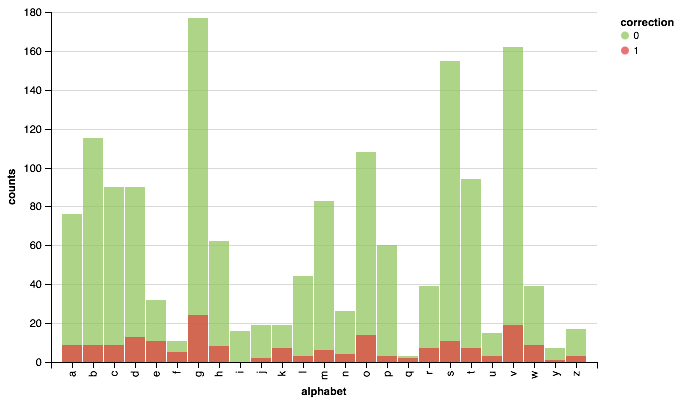

In [48]:
color_scale = alt.Scale(
            domain=[False, True],
            range=["#8dc456","#e23b3b"]
        )

chart = alt.Chart(x).mark_bar().encode(
    x='alphabet',
    y='counts',
    color=alt.Color(
        'correction',
        scale = color_scale,
    ))
chart

Out of the 1748 words from the out-of-corpus sample, Bouma & Hermans' model makes 189 syllabification mistakes on word level.

In [49]:
x = df.set_index('correction')
mistakes = x.loc[False]
mistakes

,word,bouma_hermans,lstm_model,gold_standard,alphabet
correction,,,,,
False,aertsebiscop,aert-se-bi-scop,aert-se-bi-scop,aert-se-bis-cop,a
False,agustus,a-gu-stus,a-gus-tus,a-gus-tus,a
False,aldustaniger,al-du-sta-ni-ger,al-dus-ta-ni-ger,al-dus-ta-ni-ger,a
False,alitharna,a-li-thar-na,a-lit-har-na,a-lit-har-na,a
False,andwarde,an-dwar-de,and-war-de,and-war-de,a
False,argheiden,ar-ghei-den,ar-ghei-den,arg-hei-den,a
False,arimathyen,a-ri-ma-thyen,a-ri-ma-thy-en,a-ri-ma-thy-en,a
False,astiages,a-sti-a-ges,as-ti-a-ges,as-ti-a-ges,a
False,ayzine,a-y-zi-ne,ay-zi-ne,ay-zi-ne,a


### 2. Evaluation of LSTM model on out-of corpus sample

In [50]:
df = pd.read_excel('../data/evaluation_syllabifier.xlsx')
df['correction'] = (df['lstm_model'] == df['gold_standard'])
df['alphabet'] = df['gold_standard'].astype(str).str[0]

x = df.groupby('alphabet').correction.value_counts().to_frame()
x.columns = ['counts']
x = x.reset_index()
x

,alphabet,correction,counts
0,a,True,83
1,a,False,2
2,b,True,123
3,b,False,1
4,c,True,97
5,c,False,2
6,d,True,101
7,d,False,2
8,e,True,42
9,e,False,1


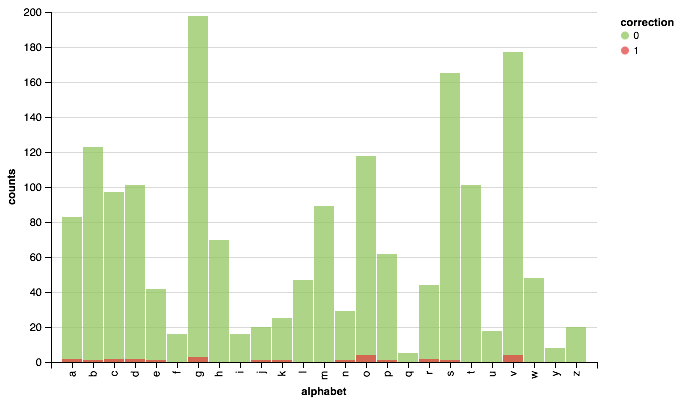

In [51]:
color_scale = alt.Scale(
            domain=[False, True],
            range=["#8dc456","#e23b3b"]
        )

chart = alt.Chart(x).mark_bar().encode(
    x='alphabet',
    y='counts',
    color=alt.Color(
        'correction',
        scale = color_scale,
    ))
chart

Like we did for Bouma & Hermans, we list all the mistakes made by the LSTM-syllabifier, along with their respective manual correction.

In [41]:
x = df.set_index('correction')
mistakes = x.loc[False]
mistakes

,word,bouma_hermans,lstm_model,gold_standard,alphabet
correction,,,,,
False,aertsebiscop,aert-se-bi-scop,aert-se-bi-scop,aert-se-bis-cop,a
False,argheiden,ar-ghei-den,ar-ghei-den,arg-hei-den,a
False,beruerten,be-ruer-ten,ber-uer-ten,be-ruer-ten,b
False,centtauroene,cent-tau-roe-ne,centt-aur-oe-ne,cent-tau-roe-ne,c
False,crieerden,cri-eer-den,crieer-den,cri-eer-den,c
False,delachtich,de-lach-tich,de-lach-tich,del-ach-tich,d
False,destrueren,de-strue-ren,des-true-ren,des-tru-e-ren,d
False,eersebiscop,eer-se-bi-scop,eer-se-bi-scop,eer-se-bis-cop,e
False,geloochent,ge-looc-hent,ge-looc-hent,ge-loo-chent,g


-----------------------------------------------------------------------------------------------------------------

Reference

G. Bouma and B. Hermans. _Syllabification of Middle Dutch_. In F. Mam- brini, M. Passarotti, and C. Sporleder, editors, _Proceedings of the Second Workshop on Annotation of Corpora for Research in the Humanities_, pp. 27-39, 2012.

-------